# 050 Models : Answers to exercises

#### Exercise 1

In a file `lut_RMSE.py` do the following:

        import numpy as np
        # define the min and max and step for the grid we want
        p0min,p0max,p0step = 0.0,10.0,0.05
        p1min,p1max,p1step = 0.0,0.001,0.000005

        gridp0,gridp1 = np.mgrid[p0min:p0max+p0step:p0step,\
                                 p1min:p1max+p1step:p1step]


* Write a function `gen_lut` to return a 2D parameter (Look up table -- LUT) grid using `np.mgrid` as above as `param = [gridp0,gridp1]`

        # simple model 
        def model(driver,param):
            '''2-parameter quadratic model with noise'''
            return param[0] + param[1] * driver * driver
          
* Write a function `model` to describe the model we will be using from the code above
            
        # code to use
        # time driver every 4 days for measurement    
        tmdriver = np.arange(0,365,4,dtype=np.int)
        # generate a pseudo-measurement
        p0 = np.array([5.0,0.0005])
        measure = model(tmdriver,p0) + 5*(np.random.random(tmdriver.shape)-0.5)
        # just make up some weights for this exercise
        measure_weight = (2 + np.random.random(tmdriver.shape))/4
        
* Write a function `gen_meas` to generate a pseudo-measurement based on the model and some noise. It should print the value of the parameters used in the model, and return `tmdriver, measure, measure_weight` corresponding to:

        * tmdriver:       array of (Nm,) floats of the day of year on which to do modelling
        * measure:        array of (Nm,) floats of measurements over sampled days of the year
        * measure_weight: array of (Nm,) floats of the weights associated with the measurements

* Write a function `lut_RMSE` that takes as inputs:

        * `param`:          list of `[p0,p1]` with `p0` and `p1` being arrays of shape `(Np0,Np1)` representing a the LUT grid over parameter space
        * `tmdriver`:       array of (Nm,) integers: the days on which the measurements occur 
        * `measure:`        array of (Nm,) floats of measurements over sampled days of the year
        * `measure_weight`: array of (Nm,) floats of the weights associated with the measurements
    
 That runs the model `model(tmdriver,param)`, calculates the weighted RMSE between the measurements and the modelled values for each parameter pair, and returns a grid of shape `(Np0,Np1)` values of RMSE associated with each parameter pair.
 
 * Write a function `runner()` that 
    * generates tmdriver, the array of (92,) floats for every 4 day of year on which to do modelling
    * gets a LUT `param` from `gen_lut`
    * gets a pseudo-measurement from `gen_meas`
    * gets a 2-D array of RMSE corresponding to the parameter grid
    * calculated and prints the value of the parameters corresponding to the minimum RMSE,
    * returns the RMSE array, the LUT, and the measurements
 
* Run `runner()` in a notebook
* Plot the RMSE values returned from this as an image
* Verify that you have identified the minimum RMSE
* Set different parameters in `gen_meas` to generate a different pseudo-measurement and repeat the process.
* Comment on the results

In [23]:
# ANSWER
# run your own script 
!geog0111/lut_RMSE.py

original parameters: [0.4, 0.0002]
min rmse
2.372352991393801
index: 2452: 0.6000000000000001,0.0002
parameters: 0.6000000000000001 0.0002


In [24]:
# ANSWER
import numpy as np
# Run runner() in a notebook
from geog0111.lut_RMSE import runner, model, gen_lut
RMSE,param,(measure,measure_weight,tmdriver) = runner()

original parameters: [0.4, 0.0002]
min rmse
2.446801263996164
index: 41: 0.0,0.00020500000000000002
parameters: 0.0 0.00020500000000000002


In [25]:
# confirm: same as in runner?
# use argmin to find min, but need to flatten/reshape arrays first
p0,p1 = param
p0_ = np.ravel(p0)
p1_ = np.ravel(p1)
# min over time axis
imin = np.argmin(RMSE,axis=0)

print(f'index: {imin}: {p0_[imin]},{p1_[imin]}')
# back to 2D
ip0min,ip1min = np.unravel_index(imin,p0.shape)
p0min = p0[ip0min,ip1min]
p1min = p1[ip0min,ip1min]

p = np.array([p0min,p1min])
print(f'parameters: {p[0]} {p[1]}')

index: 41: 0.0,0.00020500000000000002
parameters: 0.0 0.00020500000000000002


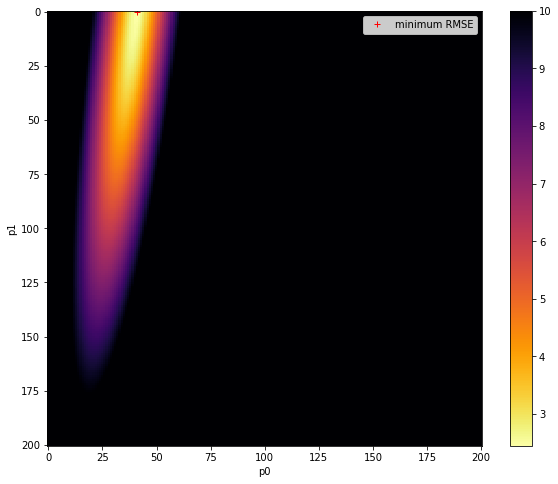

In [26]:
import matplotlib.pyplot as plt
# Plot the reshaped RMSE values returned from this as an image

# plot it
fig, axs = plt.subplots(1,1,figsize=(10,8))
im = axs.imshow(RMSE.reshape(p0.shape),interpolation="nearest",\
                vmax=10,cmap=plt.cm.inferno_r)
fig.colorbar(im, ax=axs)
axs.set_xlabel('p0')
axs.set_ylabel('p1')
plt.plot([ip1min],[ip0min],'r+',label="minimum RMSE")
axs.legend(loc='best')

original parameters: [0.7, 0.0005]
min rmse
2.034386901987606
index: 1909: 0.45,0.0005
parameters: 0.45 0.0005


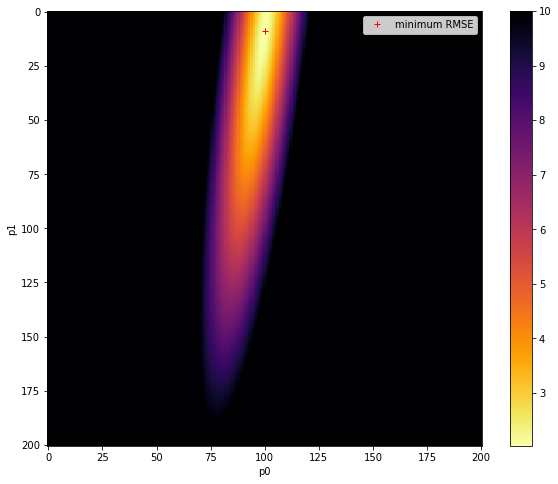

In [27]:
import numpy as np
from geog0111.lut_RMSE import gen_meas,model,lut_RMSE

# change the original parameters 
tdriver = np.arange(0,365,1,dtype=np.int)
# gets a LUT `param` from `gen_lut`
param = gen_lut()
# gets a pseudo-measurement from `gen_meas`
tmdriver,measure,measure_weight = gen_meas(p0=[0.7,0.0005])
# gets a 2-D array of RMSE corresponding to the parameter grid
RMSE = lut_RMSE(param,tmdriver,measure,measure_weight)
# calculated and prints the value of the parameters corresponding to the minimum RMSE,
min_rmse = RMSE.min()
print(f'min rmse\n{min_rmse}')

# use argmin to find min, but need to flatten/reshape arrays first
p0,p1 = param
p0_ = np.ravel(p0)
p1_ = np.ravel(p1)
# min over time axis
imin = np.argmin(RMSE,axis=0)

print(f'index: {imin}: {p0_[imin]},{p1_[imin]}')
# back to 2D
ip0min,ip1min = np.unravel_index(imin,p0.shape)
p0min = p0[ip0min,ip1min]
p1min = p1[ip0min,ip1min]

p = np.array([p0min,p1min])
print(f'parameters: {p[0]} {p[1]}')


min_rmse = RMSE.min()

fig, axs = plt.subplots(1,1,figsize=(10,8))
im = axs.imshow(RMSE.reshape(p0.shape),interpolation="nearest",\
                vmax=10,cmap=plt.cm.inferno_r)
fig.colorbar(im, ax=axs)
axs.set_xlabel('p0')
axs.set_ylabel('p1')
plt.plot([ip1min],[ip0min],'r+',label="minimum RMSE")
axs.legend(loc='best')

[0.45   0.0005]
measurements: tmdriver shape (92,)
model output: tdriver shape  (365,)


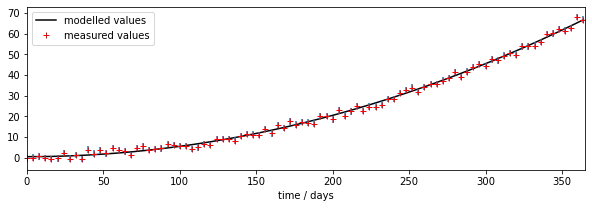

In [28]:
import matplotlib.pyplot as plt

# error bars
std = 1./np.sqrt(measure_weight) * 1.96

# time driver every day
tdriver = np.arange(0,365,1,dtype=np.int)
# get the parameters we siolved for
p = np.array([p0min,p1min])
print(p)
output  = model(tdriver,p)

# plot
fig, axs = plt.subplots(1,1,figsize=(10,3))
axs.set_xlim(0,365)
axs.plot(tdriver,output,'k',label='modelled values')
axs.errorbar(tmdriver,measure,yerr=std,ls='none')
axs.plot(tmdriver,measure,'r+',label='measured values')
# set legend now
axs.legend(loc='best')
axs.set_xlabel(f'time / days')

print(f'measurements: tmdriver shape {tmdriver.shape}')
print(f'model output: tdriver shape  {tdriver.shape}')

In [29]:
# Comment on the results

msg = '''
We confirm the findings above, but are now able to see the form of the error surface in much greater detail. 
'''
print(msg)


We confirm the findings above, but are now able to see the form of the error surface in much greater detail. 

